**Canadian Pacific Kansas City Limited (CP), Union Pacific Corporation (UNP)**

In [1]:
import yfinance as yahooFinance
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29089 sha256=8944f86602386cb2c580dce7a939e8b71955a5334b6bc29bee2f06e6e84f6432
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


In [4]:
from scipy.stats import t
from ta import momentum, trend

In [9]:
start = "1984-01-01"
end = '2023-10-17'
CP = yahooFinance.download('CP', start=start, end=end)['Adj Close']
UNP = yahooFinance.download('UNP', start=start, end=end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


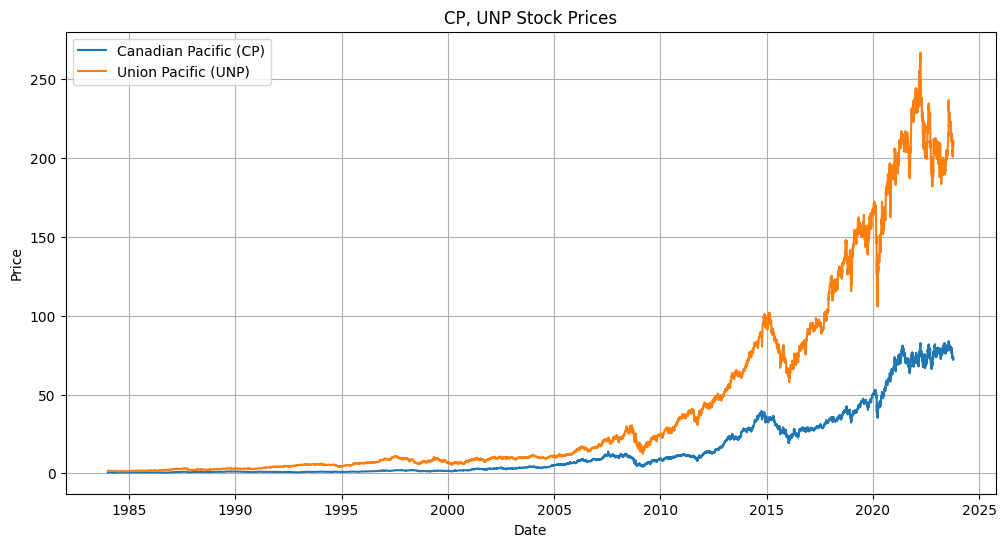

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(CP, label='Canadian Pacific (CP)')
plt.plot(UNP, label='Union Pacific (UNP)')
plt.title('CP, UNP Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
returns_CP = CP.pct_change().dropna()
returns_UNP = UNP.pct_change().dropna()
volatility_CP = returns_CP.rolling(window=30).std()
volatility_UNP = returns_UNP.rolling(window=30).std()
CP_squared_returns = returns_CP**2
UNP_squared_returns = returns_UNP**2

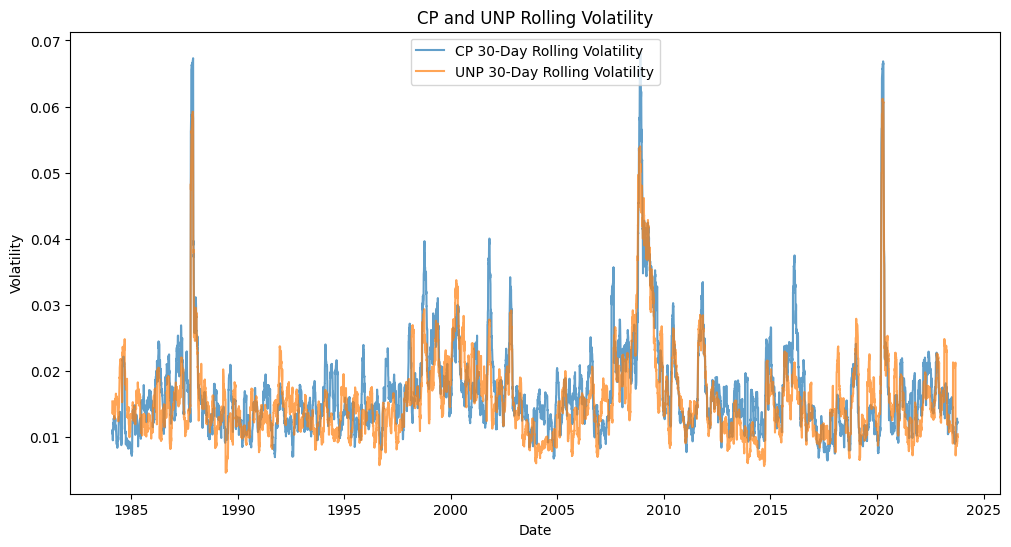

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(volatility_CP.index, volatility_CP, label='CP 30-Day Rolling Volatility',alpha=0.7)
plt.plot(volatility_UNP.index, volatility_UNP, label='UNP 30-Day Rolling Volatility',alpha=0.7)
plt.title('CP and UNP Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

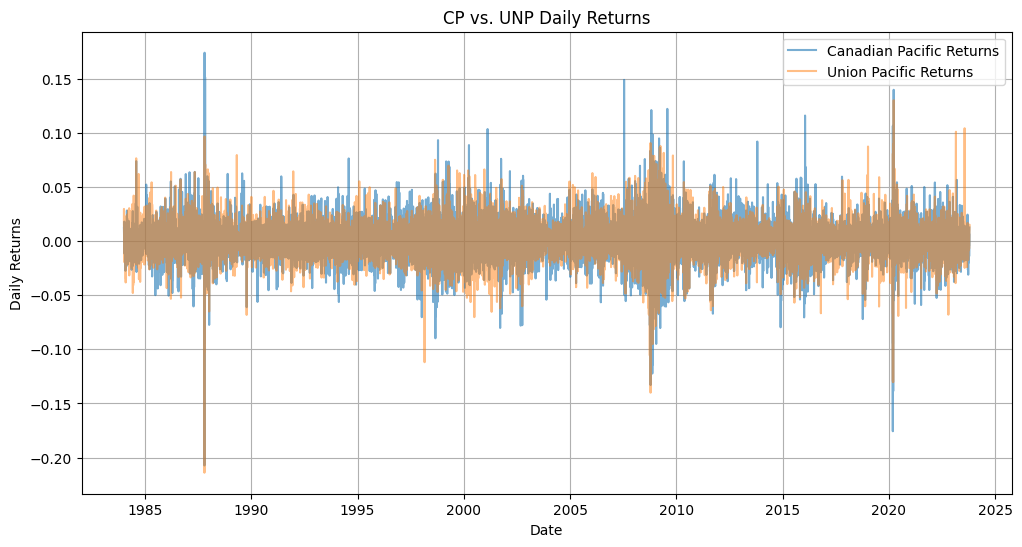

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(returns_CP, label='Canadian Pacific Returns', alpha=0.6)
plt.plot(returns_UNP, label='Union Pacific Returns', alpha=0.5)
plt.title('CP vs. UNP Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.grid(True)
plt.legend()
plt.show()

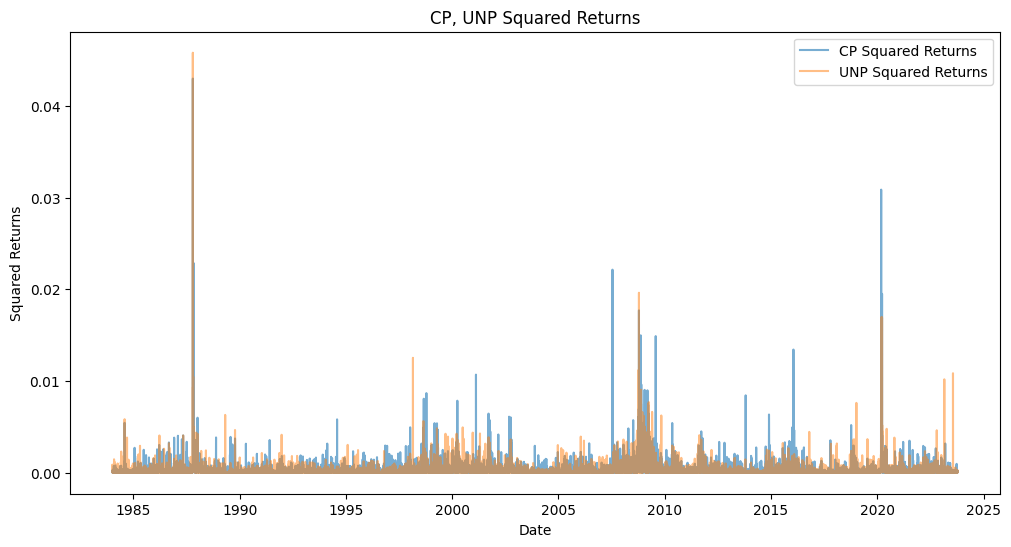

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(CP_squared_returns, label='CP Squared Returns',alpha=0.6)
plt.plot(UNP_squared_returns, label='UNP Squared Returns',alpha=0.5)
plt.title('CP, UNP Squared Returns')
plt.xlabel('Date')
plt.ylabel('Squared Returns')
plt.legend()
plt.show()

Sharpe Ratio

In [36]:
risk_free_rate = 0.048

excess_returns_CP = returns_CP.mean() - risk_free_rate
excess_returns_UNP = returns_UNP.mean() - risk_free_rate

returns_volatility_CP = returns_CP.std()
returns_volatility_UNP = returns_UNP.std()

sharpe_ratio_CP = excess_returns_CP / returns_volatility_CP
sharpe_ratio_UNP = excess_returns_UNP/ returns_volatility_UNP

print("Sharpe Ratio for CP:", sharpe_ratio_CP)
print("Sharpe Ratio for UNP:", sharpe_ratio_UNP)

Sharpe Ratio for CP: -2.587541480310775
Sharpe Ratio for UNP: -2.7844147815716203


In [38]:
positive_returns_CP = returns_CP[returns_CP > 0]
negative_returns_CP = returns_CP[returns_CP < 0]
positive_returns_UNP = returns_UNP[returns_UNP > 0]
negative_returns_UNP = returns_UNP[returns_UNP < 0]

mu1 = returns_CP.mean()
sigma1 = returns_CP.std()
simulated_returns1 = np.random.normal(mu1, sigma1, len(CP))

mu2 = returns_UNP.mean()
sigma2 = returns_UNP.std()
simulated_returns2 = np.random.normal(mu2, sigma2, len(UNP))

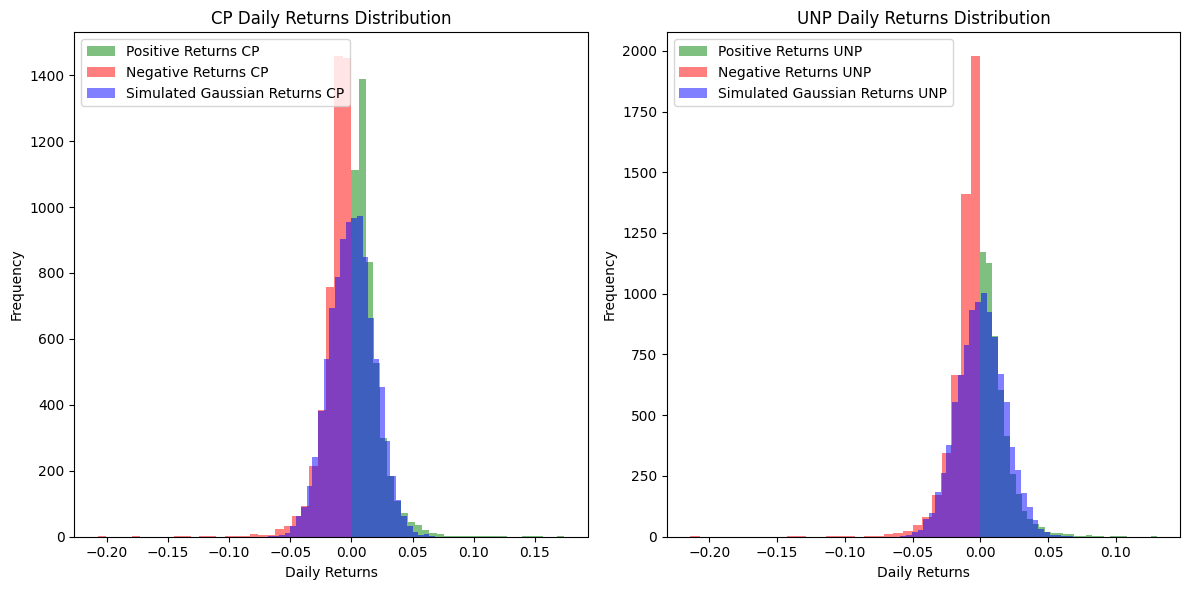

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].hist(positive_returns_CP, bins=30, alpha=0.5, color='green', label='Positive Returns CP')
axes[0].hist(negative_returns_CP, bins=30, alpha=0.5, color='red', label='Negative Returns CP')
axes[0].hist(simulated_returns1, bins=30, alpha=0.5, color='blue', label='Simulated Gaussian Returns CP')
axes[0].set_title('CP Daily Returns Distribution')
axes[0].set_xlabel('Daily Returns')
axes[0].set_ylabel('Frequency')
axes[0].legend()

axes[1].hist(positive_returns_UNP, bins=30, alpha=0.5, color='green', label='Positive Returns UNP')
axes[1].hist(negative_returns_UNP, bins=30, alpha=0.5, color='red', label='Negative Returns UNP')
axes[1].hist(simulated_returns2, bins=30, alpha=0.5, color='blue', label='Simulated Gaussian Returns UNP')
axes[1].set_title('UNP Daily Returns Distribution')
axes[1].set_xlabel('Daily Returns')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

In [56]:
std_dev1_CP = returns_CP.std()
std_dev2_CP = 2 * std_dev1_CP
std_dev1_UNP = returns_UNP.std()
std_dev2_UNP = 2 * std_dev1_UNP

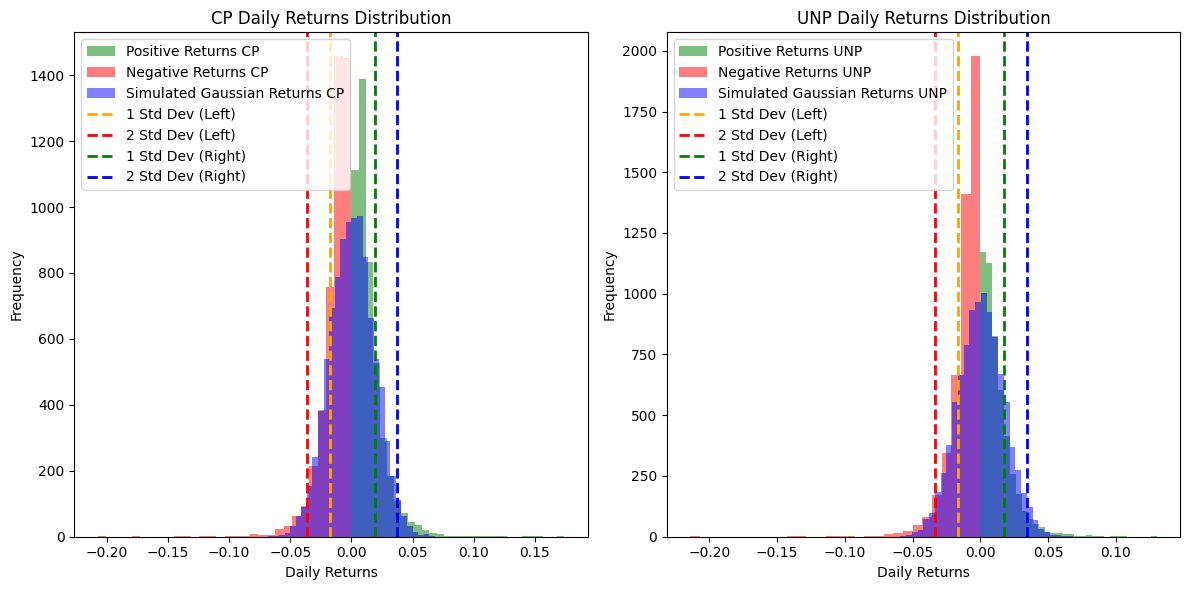

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# First subplot: CP Daily Returns Distribution
axes[0].hist(positive_returns_CP, bins=30, alpha=0.5, color='green', label='Positive Returns CP')
axes[0].hist(negative_returns_CP, bins=30, alpha=0.5, color='red', label='Negative Returns CP')
axes[0].hist(simulated_returns1, bins=30, alpha=0.5, color='blue', label='Simulated Gaussian Returns CP')
axes[0].axvline(mu1 - std_dev1_CP, color='orange', linestyle='dashed', linewidth=2, label='1 Std Dev (Left)')
axes[0].axvline(mu1 - std_dev2_CP, color='red', linestyle='dashed', linewidth=2, label='2 Std Dev (Left)')
axes[0].axvline(mu1 + std_dev1_CP, color='green', linestyle='dashed', linewidth=2, label='1 Std Dev (Right)')
axes[0].axvline(mu1 + std_dev2_CP, color='blue', linestyle='dashed', linewidth=2, label='2 Std Dev (Right)')
axes[0].set_title('CP Daily Returns Distribution')
axes[0].set_xlabel('Daily Returns')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Second subplot: UNP Daily Returns Distribution
axes[1].hist(positive_returns_UNP, bins=30, alpha=0.5, color='green', label='Positive Returns UNP')
axes[1].hist(negative_returns_UNP, bins=30, alpha=0.5, color='red', label='Negative Returns UNP')
axes[1].hist(simulated_returns2, bins=30, alpha=0.5, color='blue', label='Simulated Gaussian Returns UNP')
axes[1].axvline(mu2 - std_dev1_UNP, color='orange', linestyle='dashed', linewidth=2, label='1 Std Dev (Left)')
axes[1].axvline(mu2 - std_dev2_UNP, color='red', linestyle='dashed', linewidth=2, label='2 Std Dev (Left)')
axes[1].axvline(mu2 + std_dev1_UNP, color='green', linestyle='dashed', linewidth=2, label='1 Std Dev (Right)')
axes[1].axvline(mu2 + std_dev2_UNP, color='blue', linestyle='dashed', linewidth=2, label='2 Std Dev (Right)')
axes[1].set_title('UNP Daily Returns Distribution')
axes[1].set_xlabel('Daily Returns')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

In [47]:
from ta import add_all_ta_features
from ta.momentum import RSIIndicator
from ta.trend import MACD
import ta

In [59]:
start1 = "2014-01-01"
end1 = '2023-10-17'
symbols = ['CP', 'UNP']

In [60]:
data = {symbol: yahooFinance.download(symbol, start=start1, end=end1) for symbol in symbols}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


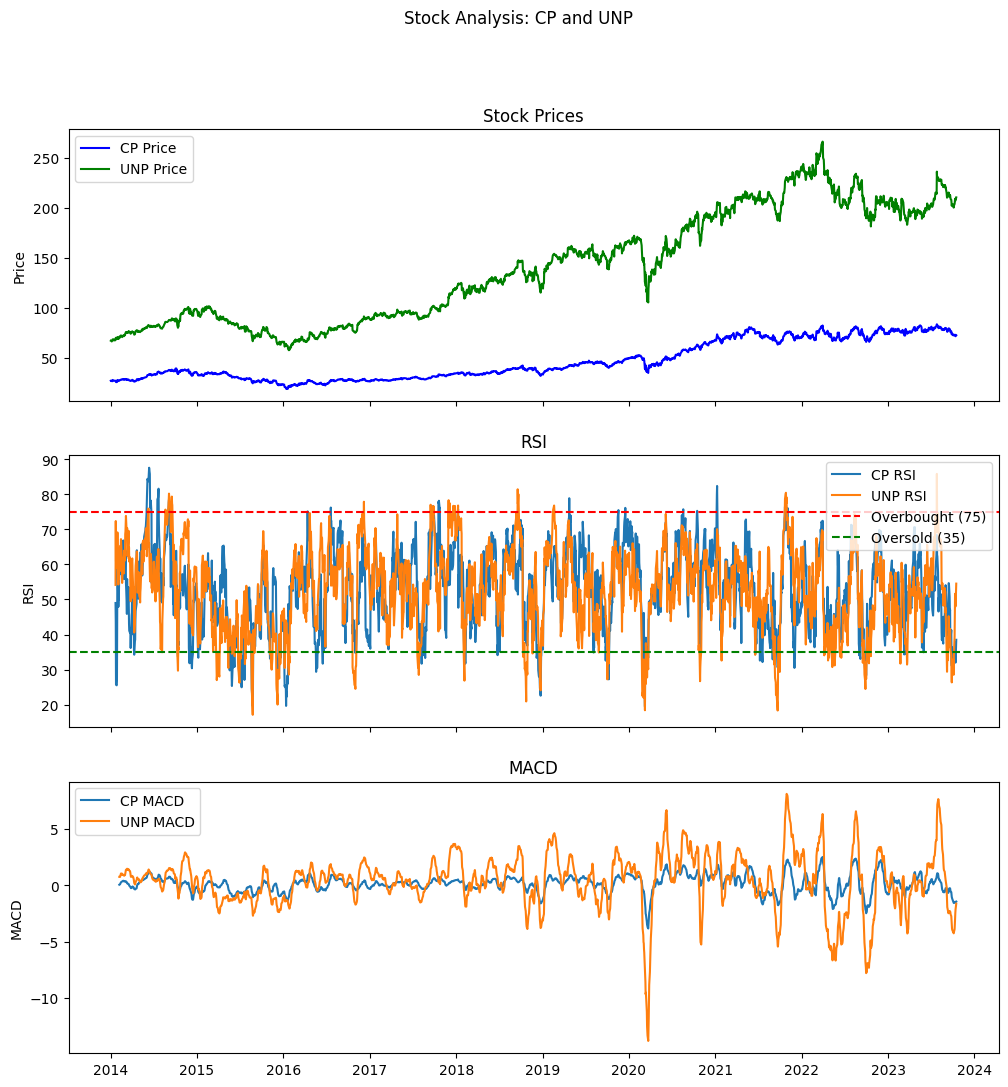

In [65]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
fig.suptitle("Stock Analysis: CP and UNP")

# 1st Subplot: Stock Prices for CP and UNP
axes[0].plot(data['CP'].index, data['CP']['Adj Close'], label='CP Price', color='blue')
axes[0].plot(data['UNP'].index, data['UNP']['Adj Close'], label='UNP Price', color='green')
axes[0].set_ylabel('Price')
axes[0].set_title('Stock Prices')
axes[0].legend(loc='best')

# 2nd Subplot: RSI for CP and UNP
for symbol in symbols:
    data[symbol]['RSI'] = ta.momentum.RSIIndicator(data[symbol]['Adj Close']).rsi()
    axes[1].plot(data[symbol].index, data[symbol]['RSI'], label=f'{symbol} RSI')
axes[1].axhline(75, linestyle='--', color='red', label='Overbought (75)')
axes[1].axhline(35, linestyle='--', color='green', label='Oversold (35)')
axes[1].set_ylabel('RSI')
axes[1].set_title('RSI')
axes[1].legend(loc='best')

# 3rd Subplot: MACD for CP and UNP
for symbol in symbols:
    data[symbol]['MACD'] = ta.trend.MACD(data[symbol]['Adj Close']).macd()
    axes[2].plot(data[symbol].index, data[symbol]['MACD'], label=f'{symbol} MACD')
axes[2].set_ylabel('MACD')
axes[2].set_title('MACD')
axes[2].legend(loc='best')

plt.show()

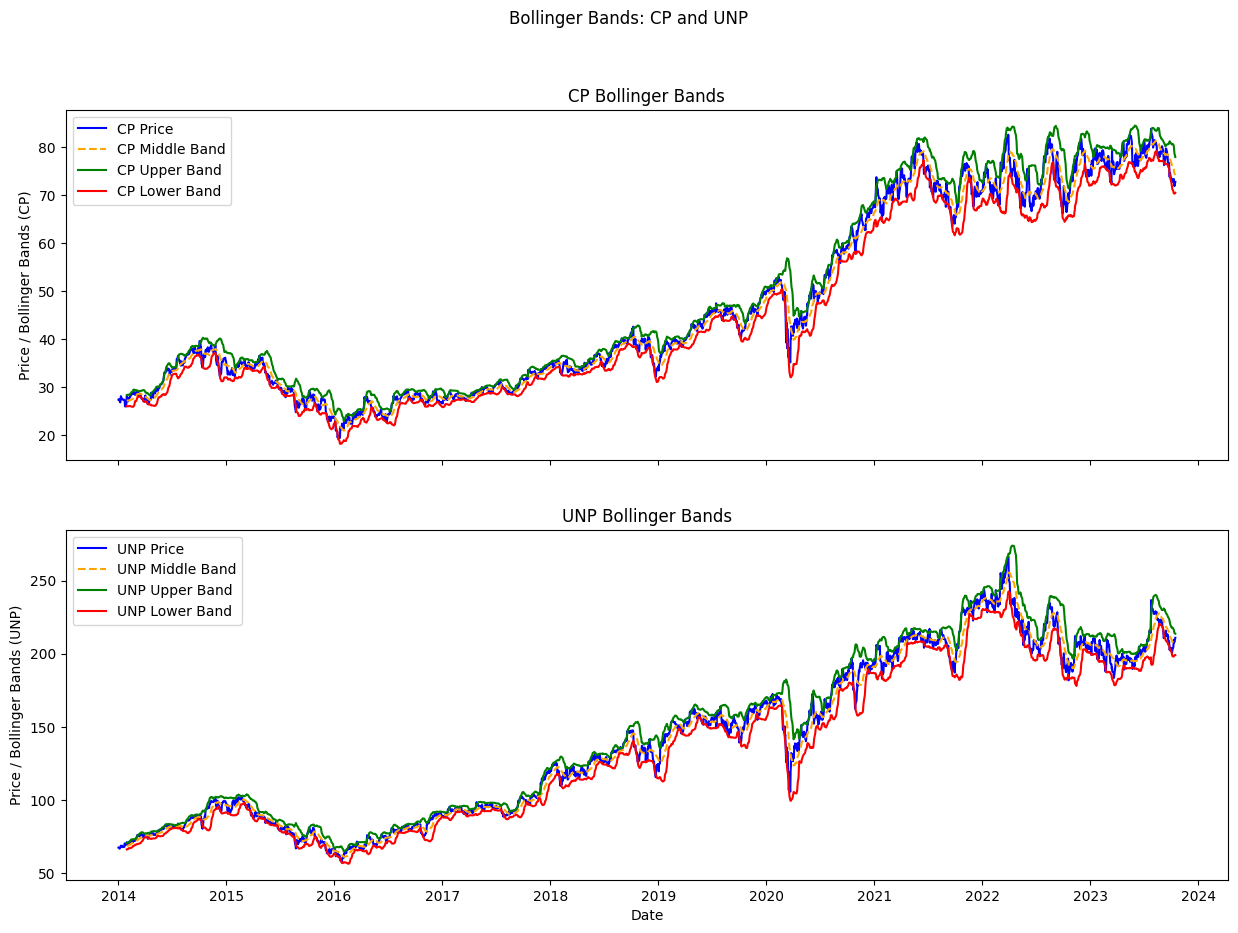

In [64]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
fig.suptitle("Bollinger Bands: CP and UNP")

# 1st Subplot: Bollinger Bands for CP
data['CP']['BB_Middle'], data['CP']['BB_Upper'], data['CP']['BB_Lower'] = ta.volatility.BollingerBands(data['CP']['Adj Close']).bollinger_mavg(), ta.volatility.BollingerBands(data['CP']['Adj Close']).bollinger_hband(), ta.volatility.BollingerBands(data['CP']['Adj Close']).bollinger_lband()
axes[0].plot(data['CP'].index, data['CP']['Adj Close'], label='CP Price', color='blue')
axes[0].plot(data['CP'].index, data['CP']['BB_Middle'], label='CP Middle Band', linestyle='--', color='orange')
axes[0].plot(data['CP'].index, data['CP']['BB_Upper'], label='CP Upper Band', color='green')
axes[0].plot(data['CP'].index, data['CP']['BB_Lower'], label='CP Lower Band', color='red')
axes[0].set_ylabel('Price / Bollinger Bands (CP)')
axes[0].set_title('CP Bollinger Bands')
axes[0].legend(loc='best')

# 2nd Subplot: Bollinger Bands for UNP
data['UNP']['BB_Middle'], data['UNP']['BB_Upper'], data['UNP']['BB_Lower'] = ta.volatility.BollingerBands(data['UNP']['Adj Close']).bollinger_mavg(), ta.volatility.BollingerBands(data['UNP']['Adj Close']).bollinger_hband(), ta.volatility.BollingerBands(data['UNP']['Adj Close']).bollinger_lband()
axes[1].plot(data['UNP'].index, data['UNP']['Adj Close'], label='UNP Price', color='blue')
axes[1].plot(data['UNP'].index, data['UNP']['BB_Middle'], label='UNP Middle Band', linestyle='--', color='orange')
axes[1].plot(data['UNP'].index, data['UNP']['BB_Upper'], label='UNP Upper Band', color='green')
axes[1].plot(data['UNP'].index, data['UNP']['BB_Lower'], label='UNP Lower Band', color='red')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price / Bollinger Bands (UNP)')
axes[1].set_title('UNP Bollinger Bands')
axes[1].legend(loc='best')

plt.show()